In [13]:
import pandas as pd
import numpy as np
import matplotlib
import requests
import json
import matplotlib.pyplot as plt

In [85]:
barriers1_df = pd.read_csv("Resources/CVAC_data_Feb2021.csv")

barriers1_df.rename(columns={'Th1_Historic_Undervaccination': 'Historic_Undervaccination', 
                            'Th2_Sociodemographic_Barriers': 'Sociodemographic_Barriers',
                           'Th3_Resource_constrained_Healthcare_System': 'Resource_constrained_Healthcare_System',
                           'Th4_Healthcare_Accessibility_Barriers': 'Healthcare_Accessibility_Barrier',
                           'Th5_Irregular_Care_Seeking_Behavior':'Irregular_Care_Seeking_Behavior'}, inplace=True)

barriers1_df

,FIPS,State,Historic_Undervaccination,Sociodemographic_Barriers,Resource_constrained_Healthcare_System,Healthcare_Accessibility_Barrier,Irregular_Care_Seeking_Behavior,CVAC
0,1,Alabama,0.36,0.88,0.52,0.96,0.80,0.78
1,2,Alaska,0.98,0.16,0.14,0.98,0.96,0.70
2,4,Arizona,0.92,0.52,0.96,0.38,0.92,0.88
3,5,Arkansas,0.34,0.96,0.74,0.88,0.78,0.88
4,6,California,0.80,0.44,0.80,0.08,0.96,0.68
5,8,Colorado,0.40,0.06,0.74,0.08,0.54,0.32
6,9,Connecticut,0.08,0.18,0.08,0.40,0.02,0.00
7,10,Delaware,0.48,0.34,0.34,0.00,0.26,0.20
8,11,District of Columbia,0.12,0.42,0.12,0.16,0.42,0.10
9,12,Florida,0.88,0.76,0.82,0.62,0.58,0.84


In [89]:
barriers_df = barriers_df.drop(columns=["FIPS", "CVAC"])

In [90]:
#top_barriers_df = barriers_df.loc[barriers_df['State'] =='California' | barriers_df['State'] == 'Texas' |
                                 # barriers_df['State'] == 'New York'| barriers_df['State'] == 'Florida' |
                                  #barriers_df['State'] =='Illinois', :]

#bottom_barriers_df = barriers_df.loc[['South Dakota', 'Vermont', 'Alaska', 'North Dakota', 'Wyoming']]

#top_barriers_df = barriers_df.loc[barriers_df["State"] =="California"]
#top_barriers_d

top_barriers_df = barriers_df.iloc[[4,43,32,9,13]]
top_barriers_df

,State,Historic_Undervaccination,Sociodemographic_Barriers,Resource_constrained_Healthcare_System,Healthcare_Accessibility_Barrier,Irregular_Care_Seeking_Behavior
4,California,0.80,0.44,0.80,0.08,0.96
43,Texas,0.58,0.74,1.00,0.54,0.88
32,New York,0.24,0.82,0.02,0.30,0.44
9,Florida,0.88,0.76,0.82,0.62,0.58
13,Illinois,0.18,0.60,0.68,0.66,0.36


In [91]:
bottom_barriers_df = barriers_df.iloc[[41,45,1,34,50]]
bottom_barriers_df

,State,Historic_Undervaccination,Sociodemographic_Barriers,Resource_constrained_Healthcare_System,Healthcare_Accessibility_Barrier,Irregular_Care_Seeking_Behavior
41,South Dakota,0.58,0.60,0.16,0.50,0.48
45,Vermont,0.82,0.26,0.00,0.46,0.16
1,Alaska,0.98,0.16,0.14,0.98,0.96
34,North Dakota,0.26,0.20,0.06,0.04,0.82
50,Wyoming,1.00,0.14,0.30,0.68,0.86


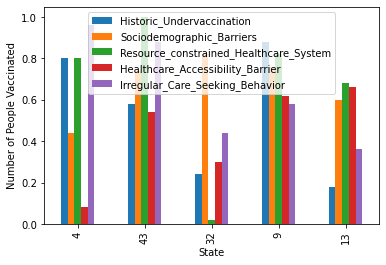

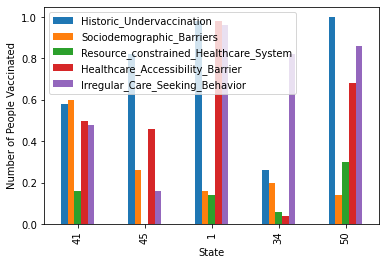

In [92]:
top_barriers_df.plot(kind="bar")
plt.xlabel("State")
plt.ylabel("Number of People Vaccinated")


plt.show()

bottom_barriers_df.plot(kind="bar")
plt.xlabel("State")
plt.ylabel("Number of People Vaccinated")


plt.show()

In [112]:
deaths_vaccstatus1_df = pd.read_csv("Resources/cases_and_deaths_by_vaccination_status.csv")
deaths_vaccstatus1_df.head()

# irr = incidentrateratio
# ir = incidentrate

deaths_vaccstatus= deaths_vaccstatus1_df.drop(columns=["mmwr_week"])


In [113]:
deaths_df= deaths_vaccstatus_df.loc[deaths_vaccstatus_df['outcome'] == 'death', :]

month_deaths_df = deaths_df.groupby('month')

month_deaths_df.head()

,outcome,month,mmwr_week,week_date,age_group,vaccine_product,crude_vax_ir,crude_unvax_ir,crude_irr
132,death,04 - APR,14,Apr 04-Apr 10,12-17,all_types,0.000000,0.027533,NaN
133,death,04 - APR,14,Apr 04-Apr 10,18-29,all_types,0.000000,0.120537,NaN
134,death,04 - APR,14,Apr 04-Apr 10,30-49,all_types,0.037839,0.575598,15.211755
135,death,04 - APR,14,Apr 04-Apr 10,50-64,all_types,0.258194,2.653614,10.277589
136,death,04 - APR,14,Apr 04-Apr 10,65-79,all_types,0.589517,9.412042,15.965697
156,death,05 - MAY,18,May 02-May 08,12-17,all_types,0.000000,0.028528,NaN
157,death,05 - MAY,18,May 02-May 08,18-29,all_types,0.000000,0.061918,NaN
158,death,05 - MAY,18,May 02-May 08,30-49,all_types,0.017152,0.417771,24.357773
159,death,05 - MAY,18,May 02-May 08,50-64,all_types,0.221359,2.303739,10.407233
160,death,05 - MAY,18,May 02-May 08,65-79,all_types,0.312429,9.089607,29.093384


In [5]:
hospitilizations_df = pd.read_csv("Resources/associated_hospitalizations_by_vaccine_status_in_adults_january-august_2021.csv")
hospitilizations_df.head()

,Week ending,Age group,Rate in unvaccinated,Rate in fully vaccinated
0,1/30/21,65+ yr,34.4,0.0
1,1/30/21,50-64 yr,21.2,1.2
2,1/30/21,18-49 yr,6.3,0.0
3,2/6/21,65+ yr,43.2,6.4
4,2/6/21,50-64 yr,15.4,0.0


In [6]:
# COVID19 Case Surveillance

covid19_surv_url = "https://data.cdc.gov/resource/n8mc-b4w4.json"
response1 = requests.get(covid19_surv_url)
response1.json()

case_surveillance_df = pd.read_json("https://data.cdc.gov/resource/n8mc-b4w4.json")
case_surveillance_df.head()

cs_updated_df = case_surveillance_df[['case_month', 'res_state','age_group', 'sex', 'race', 'current_status','death_yn']]
cs_updated_df.describe()

,case_month,res_state,age_group,sex,race,current_status,death_yn
count,1000,1000,1000,1000,1000,1000,1000
unique,19,49,6,5,9,2,4
top,2020-11,GA,18 to 49 years,Female,NA,Laboratory-confirmed case,No
freq,142,58,579,679,325,866,379


In [7]:
deleted_cs = cs_updated_df.dropna()


In [8]:
# Vaccination and Case Trends by Age

covid19_vacc_trends_url = "https://data.cdc.gov/resource/gxj9-t96f.json"
response2 = requests.get(covid19_vacc_trends_url)
response2.json()

[{'cdc_case_earliest_dt': '2021-10-27T00:00:00',
  'agegroupvacc': '<12 Years',
  '_7_day_avg_group_cases_per': '5.467940835',
  'administered_dose1_pct': '0.005',
  'series_complete_pop_pct': '0.003'},
 {'cdc_case_earliest_dt': '2021-10-27T00:00:00',
  'agegroupvacc': '12 - 15 Years',
  '_7_day_avg_group_cases_per': '5.489273016',
  'administered_dose1_pct': '0.566',
  'series_complete_pop_pct': '0.468'},
 {'cdc_case_earliest_dt': '2021-10-27T00:00:00',
  'agegroupvacc': '16 - 17 Years',
  '_7_day_avg_group_cases_per': '5.684762846',
  'administered_dose1_pct': '0.637',
  'series_complete_pop_pct': '0.542'},
 {'cdc_case_earliest_dt': '2021-10-27T00:00:00',
  'agegroupvacc': '18 - 24 Years',
  '_7_day_avg_group_cases_per': '5.350428939',
  'administered_dose1_pct': '0.662',
  'series_complete_pop_pct': '0.549'},
 {'cdc_case_earliest_dt': '2021-10-27T00:00:00',
  'agegroupvacc': '25 - 39 Years',
  '_7_day_avg_group_cases_per': '6.528197009',
  'administered_dose1_pct': '0.695',
  'serie

In [9]:
# Vaccination and Case Trends by Age

covid19_vacc_trends_url = "https://data.cdc.gov/resource/rh2h-3yt2.json"
response2 = requests.get(covid19_vacc_trends_url)
response2

<Response [200]>

In [36]:
vacc_data_df= pd.read_json(covid19_vacc_trends_url)

In [19]:
location_groups = vacc_data_df.groupby('location')
location_groups.sum()

location_groups_clean = location_groups[['location','admin_dose_1_cumulative','series_complete_cumulative']]
location_groups_sum_df= location_groups_clean.sum()

location_groups_sum_df.sort_values(by=['series_complete_cumulative'], ascending=False)

,admin_dose_1_cumulative,series_complete_cumulative
location,,
US,3531251087,3041895727
CA,496948367,408981245
TX,308804501,261384357
NY,229655411,206132706
FL,238444101,204202896
IL,156964945,124147835
PA,157281951,123270515
OH,111581248,102578248
NC,120577206,98765741


In [45]:
top_states_df = location_groups_sum.loc[['CA', 'TX', 'NY', 'FL', 'IL']]
bottom_states_df = location_groups_sum.loc[['SD', 'VT', 'AK', 'ND', 'WY']]

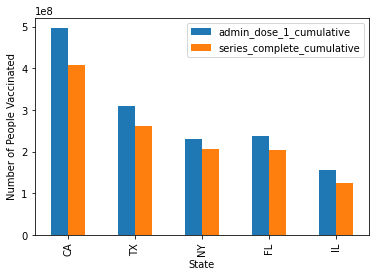

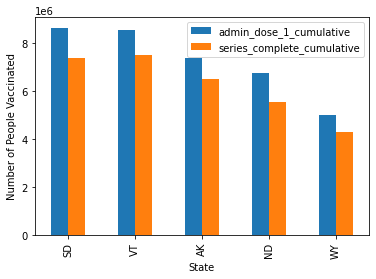

In [46]:
top_states_df.plot(kind="bar")
plt.xlabel("State")
plt.ylabel("Number of People Vaccinated")


plt.show()

bottom_states_df.plot(kind="bar")
plt.xlabel("State")
plt.ylabel("Number of People Vaccinated")


plt.show()